# Using Price Volitility
According to the efficient frontier (https://en.wikipedia.org/wiki/Efficient_frontier), it is optimal from a risk return standpoint to have a mixed portfolio as it gives you a better outcome even if one of the components has strictly higher returns and strictly less risk. 

In part one, I will be combining this aspect of portfolio theory, data from the USDA, and options prices from the CBOE to determine the optimal crop mix for a theoretical farm in DeKalb County Illinois. Through this part I look to guide through the theoretical foundations of the exercise.

In part two, I will use the same techniques as described above but apply it to the 100 most agriculturally active and mixed counties in the United States. Here I hope to prove how this solution scales and see if the solutions that I propose is viable and reflects the ground truth of determining proper crop mixing.

In part three, I will apply this methodology to other countries using FAO data to determine how they can use this theory to improve resiliency across the world in a sustainable and quantitative manor.  

Disclaimer: This analysis only begins to scratch the surface of the complexities involved in agriculture. I am cognizant of the multitude of omitted variables such as fixed and variables costs independent of land involved in such an analysis but as it exists today, I hope that this analysis can provide a framework for diversifying seed portfolio and encouraging more sustainable agriculture practices.

In [1]:
import pandas as pd #Used for DataFrames and DataWrangling
import matplotlib.pyplot as plt #for plotting
import numpy as np #For general math
from utils import * #imports functions from utils file

# Part 1: DeKalb county

In [2]:
#This is Yield Data from the USDA in terms of bushels per Acre between 2000 and 2019
yields = pd.read_csv('Data/DeKalb yields.csv').set_index('Year')
yield_corr = yields.corr()
#Historical Prices for the last five years for Teucrium's Corn, Soyb, and Weat index
prices = pd.read_csv('Data/prices.csv').set_index('Date')
price_corr = prices.corr()
#Note: I used historical data instead of futures to measure correlation since there is no financial security my knowledge, that measures correlation.
#Finding the overall corrlation by multipling each component probably doesn't scales well(if I had to guess they would be negetivly corrolated due to supply and demand)
corr = yield_corr*price_corr
print(corr)

          corn      soyb      weat
corn  1.000000  0.506619  0.192544
soyb  0.506619  1.000000  0.099486
weat  0.192544  0.099486  1.000000


In [3]:
futures = pd.read_csv('Data/FuturesPrices.csv')
temp = futures[futures['Year']==2020].set_index('Commodity')['Price']
r = temp*yields.iloc[-1]
print(r)

Commodity
corn    64494.08
soyb    48516.56
weat    29047.12
dtype: float64


In [4]:
#Going to use Options Chains and implied Volitility to predict price risks
vol = (prices.var()*np.sqrt(12)*yields.var())/r
print(vol)

corn    0.212193
soyb    0.011971
weat    0.052602
dtype: float64


In [5]:
portfolio = Portfolio(r,vol,corr)

        return       vol
weat  29047.12  0.105204
soyb  48516.56  0.023943
corn  64494.08  0.424387


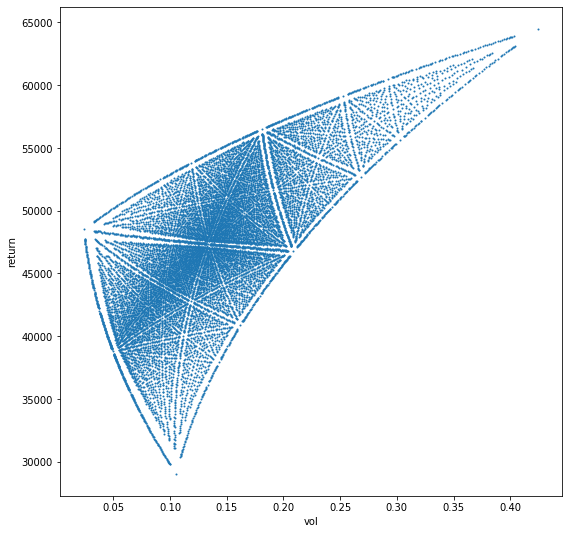

In [6]:
portfolio.df.plot.scatter('vol','return',s=1,figsize=(9,9))

temp = portfolio.df[portfolio.df[['corn','soyb','weat']].isin([1]).sum(1).astype(bool)]
temp.index = temp[['corn','soyb','weat']].idxmax(1)
temp = temp[['return','vol']]
print(temp)

The graphic above demonstrates the fact that, at least in DeKalb County, some mix of corn and soybean create the optimal mix between risk and return. 

Now, using Google Earth Engine and USDA Data, we scrape the true composite mix of crops being planted in DeKalb County and measure the price volitility optimum of farmers. See EarthEngine.py file for more detail.

In [7]:
land = pd.read_csv('Data/land.csv')
land

,Description,1
0,Corn,978.200000
1,Soybeans,507.792157
2,Developed/Low Intensity,57.403922
3,Deciduous Forest,36.670588
4,Grassland/Pasture,18.701961
...,...,...
185,Pecans,0.000000
186,Almonds,0.000000
187,Walnuts,0.000000
188,Pears,0.000000


# To Be Countinued...